In [38]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("bonus_dataset.csv")
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [40]:
performance=torch.tensor(df['performance'].values,requires_grad=True,dtype=torch.float32)
years_of_experience=torch.tensor(df['years_of_experience'].values,requires_grad=True,dtype=torch.float32)
projects_completed=torch.tensor(df['projects_completed'].values,requires_grad=True,dtype=torch.float32)
bonus=torch.tensor(df['bonus'].values,requires_grad=True,dtype=torch.float32)

In [41]:
w1=torch.rand(1,requires_grad=True)
w2=torch.rand(1,requires_grad=True)
w3=torch.rand(1,requires_grad=True)
bias=torch.rand(1,requires_grad=True)

w1,w2,w3,bias

(tensor([0.6455], requires_grad=True),
 tensor([0.3780], requires_grad=True),
 tensor([0.6738], requires_grad=True),
 tensor([0.5406], requires_grad=True))

In [42]:
w1=torch.rand(1,requires_grad=True)
w2=torch.rand(1,requires_grad=True)
w3=torch.rand(1,requires_grad=True)
bias=torch.rand(1,requires_grad=True)
epochs=5000
learning_rate=0.005
batch=16
loss_history=[]

for epoch in range(epochs):
    predicted_bouns=w1*performance+w2*years_of_experience+w3*projects_completed+bias
    loss=((predicted_bouns-bonus)**2).mean()
    loss_history.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w1-=learning_rate* w1.grad
        w2-=learning_rate* w2.grad
        w3-=learning_rate* w3.grad
        bias-=learning_rate* bias.grad
        
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    if epoch%100==0:
        print(f"Epoch:{epoch}, Loss:{loss.item():0.2f}")

Epoch:0, Loss:18427.71
Epoch:100, Loss:18.27
Epoch:200, Loss:16.31
Epoch:300, Loss:14.56
Epoch:400, Loss:13.00
Epoch:500, Loss:11.60
Epoch:600, Loss:10.36
Epoch:700, Loss:9.25
Epoch:800, Loss:8.26
Epoch:900, Loss:7.37
Epoch:1000, Loss:6.58
Epoch:1100, Loss:5.88
Epoch:1200, Loss:5.25
Epoch:1300, Loss:4.68
Epoch:1400, Loss:4.18
Epoch:1500, Loss:3.73
Epoch:1600, Loss:3.33
Epoch:1700, Loss:2.98
Epoch:1800, Loss:2.66
Epoch:1900, Loss:2.37
Epoch:2000, Loss:2.12
Epoch:2100, Loss:1.89
Epoch:2200, Loss:1.69
Epoch:2300, Loss:1.51
Epoch:2400, Loss:1.34
Epoch:2500, Loss:1.20
Epoch:2600, Loss:1.07
Epoch:2700, Loss:0.96
Epoch:2800, Loss:0.85
Epoch:2900, Loss:0.76
Epoch:3000, Loss:0.68
Epoch:3100, Loss:0.61
Epoch:3200, Loss:0.54
Epoch:3300, Loss:0.48
Epoch:3400, Loss:0.43
Epoch:3500, Loss:0.39
Epoch:3600, Loss:0.34
Epoch:3700, Loss:0.31
Epoch:3800, Loss:0.27
Epoch:3900, Loss:0.25
Epoch:4000, Loss:0.22
Epoch:4100, Loss:0.20
Epoch:4200, Loss:0.17
Epoch:4300, Loss:0.16
Epoch:4400, Loss:0.14
Epoch:4500, 

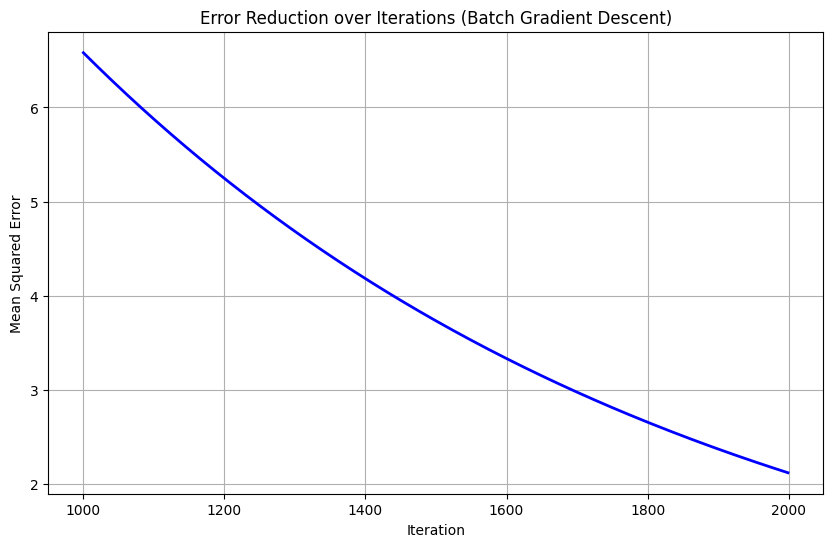

In [43]:
def plot_loss(epochs, loss_history, title):
    # Plotting the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

plot_loss(range(1000, 2000), loss_history[1000:2000], "Error Reduction over Iterations (Batch Gradient Descent)")

In [45]:
w1=torch.rand(1,requires_grad=True)
w2=torch.rand(1,requires_grad=True)
w3=torch.rand(1,requires_grad=True)
bias=torch.rand(1,requires_grad=True)
epochs=500
learning_rate=0.005
batch_size=16
n_samples=len(performance)
loss_history=[]

for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Select the mini-batch
        batch_performance = performance[i:i + batch_size]
        batch_years_of_experience = years_of_experience[i:i + batch_size]
        batch_projects_completed = projects_completed[i:i + batch_size]
        batch_bonus = bonus[i:i + batch_size]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss
        loss = ((predicted_bonus - batch_bonus) ** 2).mean()
        loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 6.9963
Epoch [200/500], Loss: 3.2261
Epoch [300/500], Loss: 1.4933
Epoch [400/500], Loss: 0.6914
Epoch [500/500], Loss: 0.3201
Learned weights: w1 = 12.1274, w2 = 5.6281, w3 = 2.4961
Learned bias: 17.3363


In [ ]:
plot_loss(range(1000, 1300), loss_history[1000:1300], "Error Reduction over Iterations (mini Batch Gradient Descent)")

In [49]:
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

# Parameters for Stochastic Gradient Descent
learning_rate = 0.001
epochs = 500

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for stochastic gradient descent
for epoch in range(epochs):
    for i in range(n_samples):
        # Select a single data point
        single_performance = performance[i]
        single_years_of_experience = years_of_experience[i]
        single_projects_completed = projects_completed[i]
        single_bonus = bonus[i]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss for this data point
        loss = (predicted_bonus - single_bonus) ** 2
        
        if i%10==0:
            loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 0.7468
Epoch [200/500], Loss: 0.0660
Epoch [300/500], Loss: 0.0058
Epoch [400/500], Loss: 0.0005
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0023, w2 = 5.9929, w3 = 2.0091
Learned bias: 19.9554


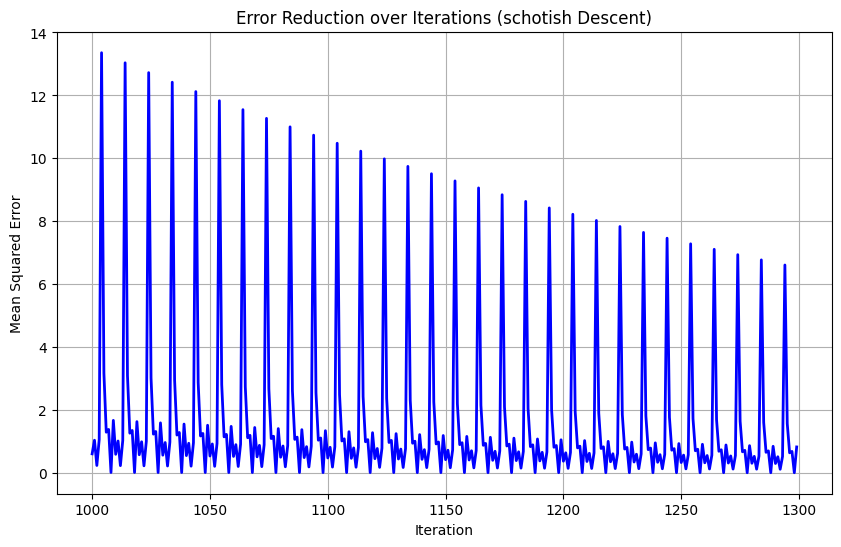

In [50]:
plot_loss(range(1000, 1300), loss_history[1000:1300], "Error Reduction over Iterations (schotish Descent)")